In [1]:
import numpy as np
from astropy.table import Table, Column
from numpy import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import astropy.coordinates as coords
import astropy.units as u

In [2]:
b = Table.read("fullcrossmatchcorrecteddistance.fits")
b.info

<Table masked=True length=198666>
              name                dtype   shape        unit       n_bad 
-------------------------------- -------- ------ ---------------- ------
                       APSTAR_ID  bytes45                              0
                     TARGET_ID_1  bytes34                              0
                       ASPCAP_ID  bytes46                              0
                            FILE  bytes38                              0
                     APOGEE_ID_1  bytes18                              0
                       TELESCOPE   bytes8                              0
                   LOCATION_ID_1    int16                              0
                         FIELD_1  bytes16                              0
                               J  float32                              0
                           J_ERR  float32                              0
                               H  float32                              0
                 

In [47]:
ID = b['APOGEE_ID_1']

RA = b['ra_2']
DEC = b['dec_2']
PARALLAX = b['parallax_1']
PARALLAXERR = b['parallax_error']
LONG = b['GAIA_LONG']
LAT = b['GAIA_LAT']
DISTANCE = b['r_est']
DIST = ((DISTANCE/1000)/u.pc)*u.kpc
DLO = ((b['r_lo']/1000)/u.pc)*u.kpc
DHI = ((b['r_hi']/1000)/u.pc)*u.kpc

TEMP = b['TEFF']
TEMPERR = b['TEFF_ERR']
LOGG = b['LOGG']
LOGGERR = b['LOGG_ERR']
MH = b['M_H']
MHERR = b['M_H']
AM = b['ALPHA_M']
AMERR = b['ALPHA_M_ERR']
X_H = b['X_H']
X_H_ERR = b['X_H_ERR']
X_M = b['X_M']
X_M_ERR = b['X_M_ERR']
C_FE = b['C_FE']
CI_FE = b['CI_FE']
N_FE = b['N_FE']
O_FE = b['O_FE']
NA_FE = b['NA_FE']
MG_FE = b['MG_FE']
AL_FE = b['AL_FE']
SI_FE = b['SI_FE']
P_FE = b['P_FE']
S_FE = b['S_FE']
K_FE = b['K_FE']
CA_FE = b['CA_FE']
TI_FE = b['TI_FE']
TIII_FE = b['TIII_FE']
V_FE = b['V_FE']
CR_FE = b['CR_FE']
MN_FE = b['MN_FE']
FE_H = b['FE_H_1']
CO_FE = b['CO_FE']
NI_FE = b['NI_FE']
CU_FE = b['CU_FE']
GE_FE = b['GE_FE']
RB_FE = b['RB_FE']
Y_FE = b['Y_FE']
ND_FE = b['ND_FE']

In [48]:

GC = coords.SkyCoord(RA, DEC, DIST)
GCGAL = GC.transform_to(coords.Galactocentric)
GX = GCGAL.x
GY = GCGAL.y
GZ = GCGAL.z

radius = ((GX**2 + GY**2 + GZ**2)**0.5)/u.kpc
cr = ((GX**2 + GY**2)**0.5)/u.kpc
height = GZ/u.kpc

In [49]:
flag = b['ASPCAPFLAG'] 

test = [a**23 ==1 for a in flag];
cond1 = np.array(test) == 0;
cond1 = np.array(cond1)

cond2 = np.logical_and(abs(AM) < 1, abs(FE_H) < 1)
cond3 = np.logical_and(cond1,cond2)

In [50]:
ID = ID[cond3]
DIST = DIST[cond3]
DLO = DLO[cond3]
DHI = DHI[cond3]
TEMP = TEMP[cond3]
TEMPERR = TEMPERR[cond3]
LOGG = LOGG[cond3]
LOGGERR = LOGGERR[cond3]
MH = MH[cond3]
MHERR = MHERR[cond3]
AM = AM[cond3]
AMERR = AMERR[cond3]
X_H = X_H[cond3]
X_H_ERR = X_H_ERR[cond3]
X_M = X_M[cond3]
X_M_ERR = X_M_ERR[cond3]
C_FE = C_FE[cond3]
CI_FE = CI_FE[cond3]
N_FE = N_FE[cond3]
O_FE = O_FE[cond3]
NA_FE = NA_FE[cond3]
MG_FE = MG_FE[cond3]
AL_FE = AL_FE[cond3]
SI_FE = SI_FE[cond3]
P_FE = P_FE[cond3]
S_FE = S_FE[cond3]
K_FE = K_FE[cond3]
CA_FE = CA_FE[cond3]
TI_FE = TI_FE[cond3]
TIII_FE = TIII_FE[cond3]
V_FE = V_FE[cond3]
CR_FE = CR_FE[cond3]
MN_FE = MN_FE[cond3]
FE_H = FE_H[cond3]
CO_FE = CO_FE[cond3]
NI_FE = NI_FE[cond3]
CU_FE = CU_FE[cond3]
GE_FE = GE_FE[cond3]
RB_FE = RB_FE[cond3]
Y_FE1 = Y_FE[cond3]
ND_FE1 = ND_FE[cond3]
RAD = radius[cond3]
CYLRAD = cr[cond3]
GX = GX[cond3]
GY = GY[cond3]
GZ = GZ[cond3]

In [42]:
data = [ID, DIST, DLO, DHI, RAD, CYLRAD, GX, GY, GZ, TEMP, TEMPERR, LOGG, LOGGERR, MH, MHERR, AM, AMERR, X_H, X_H_ERR, X_M, X_M_ERR, 
       C_FE, CI_FE, N_FE, O_FE, NA_FE, MG_FE, AL_FE, SI_FE, P_FE, S_FE, K_FE, CA_FE, TI_FE, TIII_FE, V_FE, CR_FE,
       MN_FE, FE_H, CO_FE, NI_FE, CU_FE, GE_FE, RB_FE, Y_FE1, ND_FE1]
colnames = ['ID', 'DIST', 'DLO', 'DHI', 'RAD', 'CYLRAD', 'GX', 'GY', 'GZ', 'TEMP', 'TEMPERR', 'LOGG', 'LOGGERR', 'MH', 
            'MHERR', 'AM', 'AMERR', 'X_H', 'X_H_ERR', 'X_M', 'X_M_ERR', 'C_FE', 'CI_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 
            'AL_FE', 'SI_FE', 'P_FE', 'S_FE', 'K_FE', 'CA_FE', 'TI_FE', 'TIII_FE', 'V_FE', 'CR_FE', 'MN_FE', 'FE_H', 
            'CO_FE', 'NI_FE', 'CU_FE', 'GE_FE', 'RB_FE', 'Y_FE', 'ND_FE']
dtable = Table(data, names=colnames)

dtable.write('FullCrossmatchCD.fits')

In [52]:
ttake = np.logical_and(TEMP < 5300., TEMP > 4800.)
grtake = np.logical_and(LOGG > 2., LOGG < 3.)
cond4 = np.logical_and(ttake, grtake)
 
GSID = ID[cond4]
GSDIST = DIST[cond4]
GSDLO = DLO[cond4]
GSDHI = DHI[cond4]
GSTEMP = TEMP[cond4]
GSTEMPERR = TEMPERR[cond4]
GSLOGG = LOGG[cond4]
GSLOGGERR = LOGGERR[cond4]
GSMH = MH[cond4]
GSMHERR = MHERR[cond4]
GSAM = AM[cond4]
GSAMERR = AMERR[cond4]
GSX_H = X_H[cond4]
GSX_H_ERR = X_H_ERR[cond4]
GSX_M = X_M[cond4]
GSX_M_ERR = X_M_ERR[cond4]
GSC_FE = C_FE[cond4]
GSCI_FE = CI_FE[cond4]
GSN_FE = N_FE[cond4]
GSO_FE = O_FE[cond4]
GSNA_FE = NA_FE[cond4]
GSMG_FE = MG_FE[cond4]
GSAL_FE = AL_FE[cond4]
GSSI_FE = SI_FE[cond4]
GSP_FE = P_FE[cond4]
GSS_FE = S_FE[cond4]
GSK_FE = K_FE[cond4]
GSCA_FE = CA_FE[cond4]
GSTI_FE = TI_FE[cond4]
GSTIII_FE = TIII_FE[cond4]
GSV_FE = V_FE[cond4]
GSCR_FE = CR_FE[cond4]
GSMN_FE = MN_FE[cond4]
GSFE_H = FE_H[cond4]
GSCO_FE = CO_FE[cond4]
GSNI_FE = NI_FE[cond4]
GSCU_FE = CU_FE[cond4]
GSGE_FE = GE_FE[cond4]
GSRB_FE = RB_FE[cond4]
GSY_FE = Y_FE1[cond4]
GSND_FE = ND_FE1[cond4]
GSRAD = RAD[cond4]
GSCYLRAD = CYLRAD[cond4]
GSGX = GX[cond4]
GSGY = GY[cond4]
GSGZ = GZ[cond4]

In [54]:
data = [GSID, GSDIST, GSDLO, GSDHI, GSRAD, GSCYLRAD, GSGX, GSGY, GSGZ, GSTEMP, GSTEMPERR, GSLOGG, GSLOGGERR, GSMH, 
        GSMHERR, GSAM, GSAMERR, GSX_H, GSX_H_ERR, GSX_M, GSX_M_ERR, GSC_FE, GSCI_FE, GSN_FE, GSO_FE, GSNA_FE, GSMG_FE,
        GSAL_FE, GSSI_FE, GSP_FE, GSS_FE, GSK_FE, GSCA_FE, GSTI_FE, GSTIII_FE, GSV_FE, GSCR_FE, GSMN_FE, GSFE_H, 
        GSCO_FE, GSNI_FE, GSCU_FE, GSGE_FE, GSRB_FE, GSY_FE, GSND_FE]
colnames = ['ID', 'DIST', 'DLO', 'DHI', 'RAD', 'CYLRAD', 'GX', 'GY', 'GZ', 'TEMP', 'TEMPERR', 'LOGG', 'LOGGERR', 'MH', 
            'MHERR', 'AM', 'AMERR', 'X_H', 'X_H_ERR', 'X_M', 'X_M_ERR', 'C_FE', 'CI_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 
            'AL_FE', 'SI_FE', 'P_FE', 'S_FE', 'K_FE', 'CA_FE', 'TI_FE', 'TIII_FE', 'V_FE', 'CR_FE', 'MN_FE', 'FE_H', 
            'CO_FE', 'NI_FE', 'CU_FE', 'GE_FE', 'RB_FE', 'Y_FE', 'ND_FE']
dtable = Table(data, names=colnames)

dtable.write('FullCrossmatchCDGS.fits')

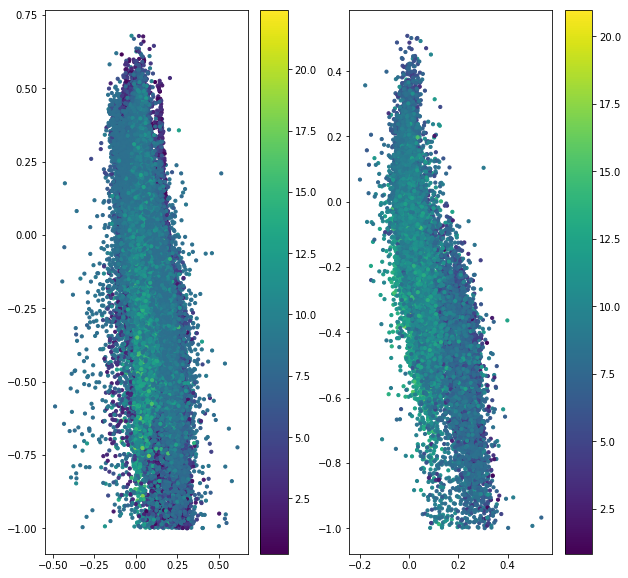

In [55]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,2,1)
P1 = ax1.scatter(AM, FE_H, s=10, c=RAD)
plt.colorbar(P1)
ax2 = plt.subplot(1,2,2)
P2 = ax2.scatter(GSAM, GSFE_H, s=10, c=GSRAD)
plt.colorbar(P2)

In [64]:
ccut = (np.abs(GSC_FE) < 1.)
cicut = (np.abs(GSCI_FE) < 1.)
ncut = (np.abs(GSN_FE) < 1.)
ocut = (np.abs(GSO_FE) < 1.)
nacut = (np.abs(GSNA_FE) < 1.)
mgcut = (np.abs(GSMG_FE) < 1.)
alcut = (np.abs(GSAL_FE) < 1.)
sicut = (np.abs(GSSI_FE) < 1.)
pcut = (np.abs(GSP_FE) < 1.)
scut = (np.abs(GSS_FE) < 1.)
kcut = (np.abs(GSK_FE) < 1.)
cacut = (np.abs(GSCA_FE) < 1.)
ticut = (np.abs(GSTI_FE) < 1.)
tiiicut = (np.abs(GSTIII_FE) < 1.)
vcut = (np.abs(GSV_FE) < 1.)
crcut = (np.abs(GSCR_FE) < 1.)
mncut = (np.abs(GSMN_FE) < 1.)
cocut = (np.abs(GSCO_FE) < 1.)
nicut = (np.abs(GSNI_FE) < 1.)
cucut = (np.abs(GSCU_FE) < 1.)
gecut = (np.abs(GSGE_FE) < 1.)
rbcut = (np.abs(GSRB_FE) < 1.)
ycut = (np.abs(GSY_FE) < 1.)
ndcut = (np.abs(GSND_FE) < 1.)

41639

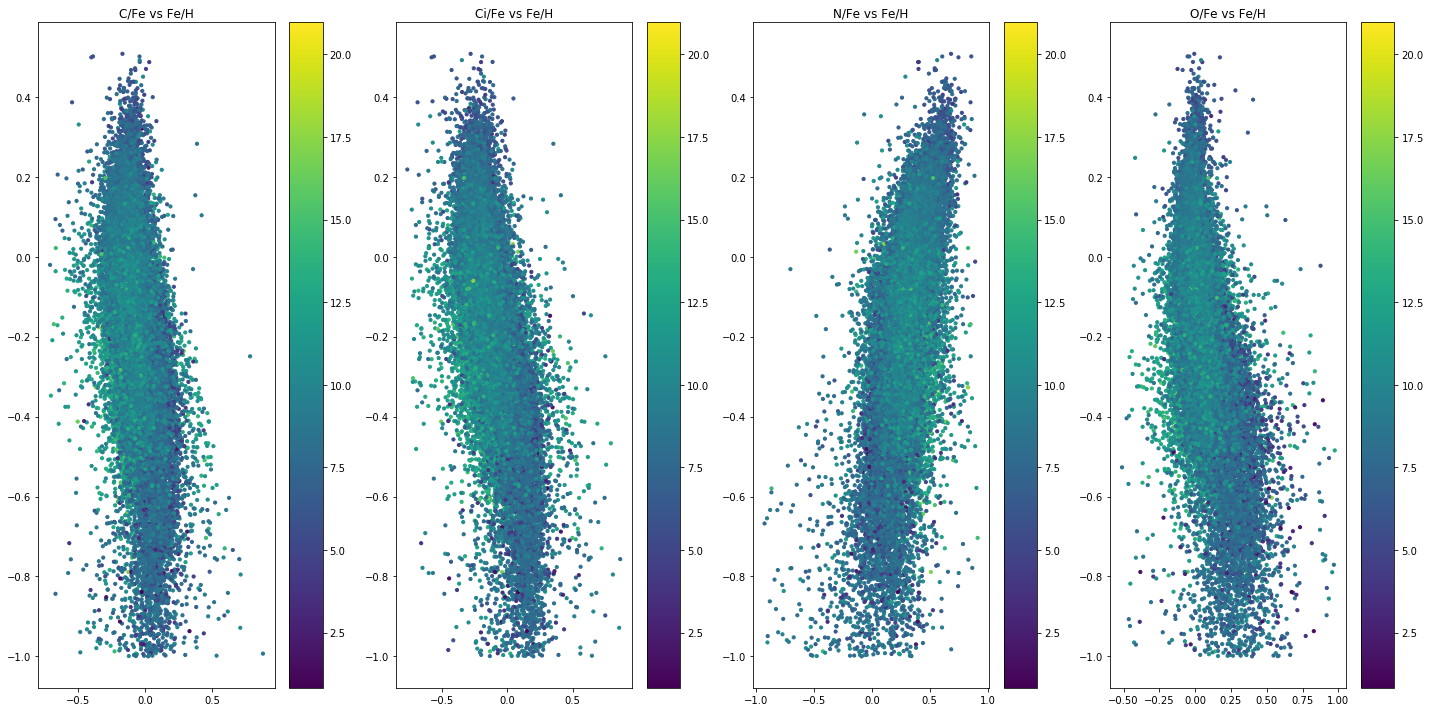

In [68]:

plt.figure(figsize=(20, 10))
ax1 = plt.subplot(1,4,1)
P1 = ax1.scatter(GSC_FE[ccut], GSFE_H[ccut], s=10, c=GSRAD[ccut])
plt.title('C/Fe vs Fe/H')
plt.colorbar(P1)
ax2 = plt.subplot(1,4,2)
P2 = ax2.scatter(GSCI_FE[cicut], GSFE_H[cicut], s=10, c=GSRAD[cicut])
plt.title('Ci/Fe vs Fe/H')
plt.colorbar(P2)
ax3 = plt.subplot(1,4,3)
P3 = ax3.scatter(GSN_FE[ncut], GSFE_H[ncut], s=10, c=GSRAD[ncut])
plt.title('N/Fe vs Fe/H')
plt.colorbar(P3)
ax4 = plt.subplot(1,4,4)
P4 = ax4.scatter(GSO_FE[ocut], GSFE_H[ocut], s=10, c=GSRAD[ocut])
plt.title('O/Fe vs Fe/H')
plt.colorbar(P4)
plt.tight_layout()

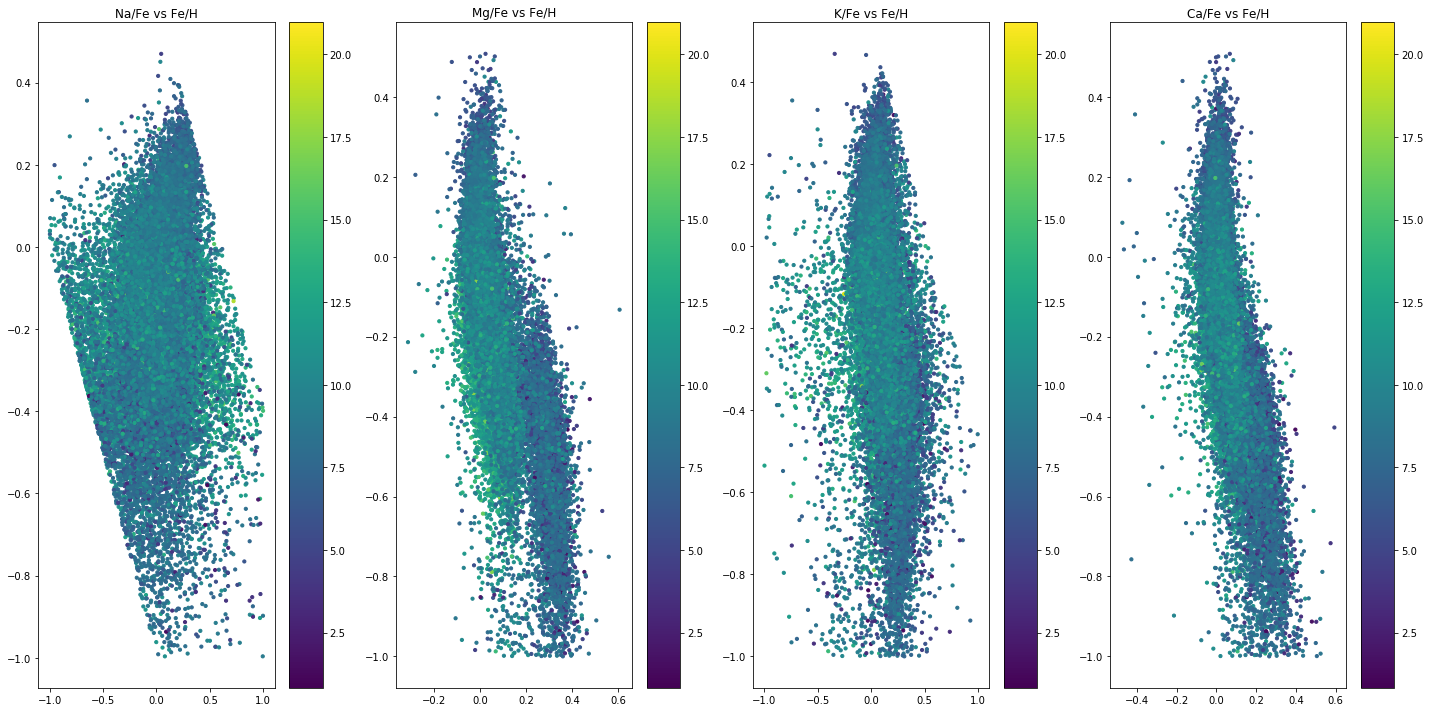

In [71]:
plt.figure(figsize=(20, 10))
ax5 = plt.subplot(1,4,1)
P5 = ax5.scatter(GSNA_FE[nacut], GSFE_H[nacut], s=10, c=GSRAD[nacut])
plt.title('Na/Fe vs Fe/H')
plt.colorbar(P5)
ax6 = plt.subplot(1,4,2)
P6 = ax6.scatter(GSMG_FE[mgcut], GSFE_H[mgcut], s=10, c=GSRAD[mgcut])
plt.title('Mg/Fe vs Fe/H')
plt.colorbar(P6)
ax7 = plt.subplot(1,4,3)
P7 = ax7.scatter(GSAL_FE[alcut], GSFE_H[alcut], s=10, c=GSRAD[alcut])
plt.title('K/Fe vs Fe/H')
plt.colorbar(P7)
ax8 = plt.subplot(1,4,4)
P8 = ax8.scatter(GSSI_FE[sicut], GSFE_H[sicut], s=10, c=GSRAD[sicut])
plt.title('Ca/Fe vs Fe/H')
plt.colorbar(P8)
plt.tight_layout()

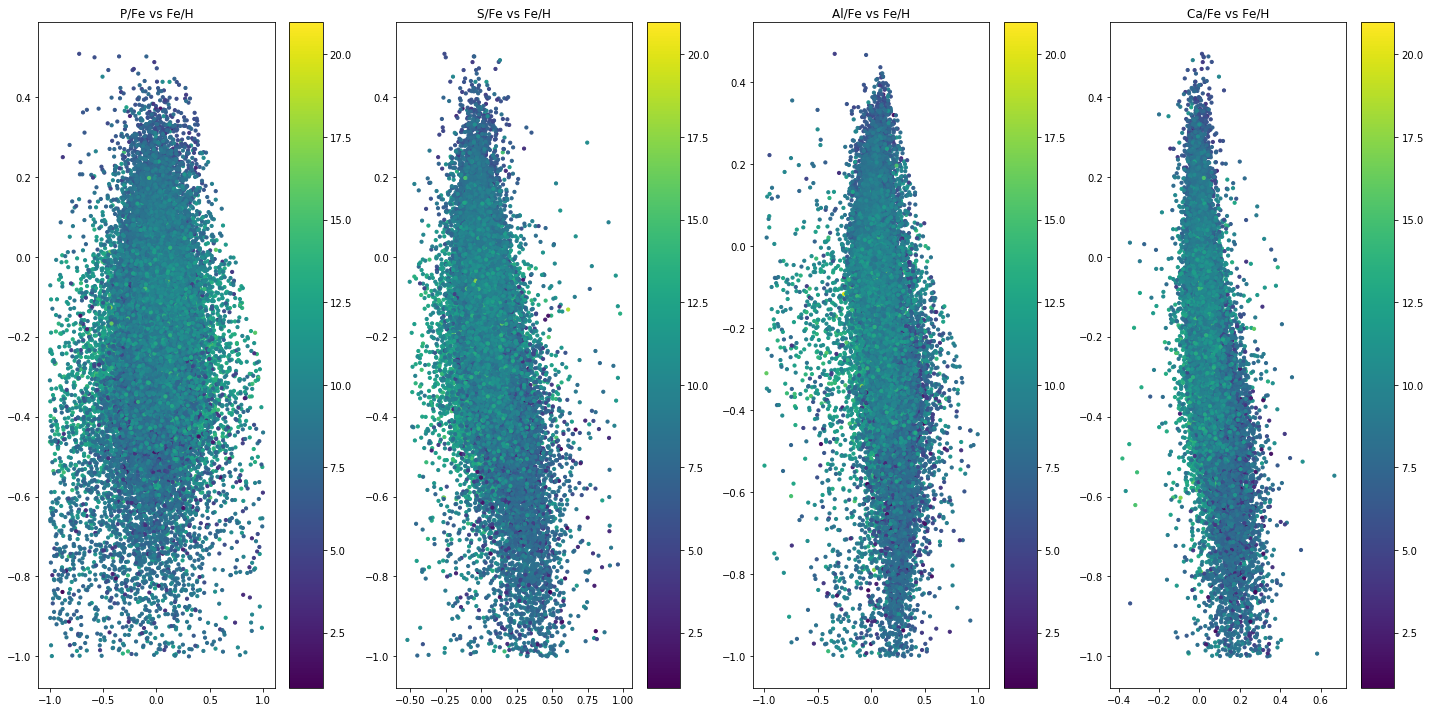

In [72]:
plt.figure(figsize=(20, 10))
ax9 = plt.subplot(1,4,1)
P9 = ax9.scatter(GSP_FE[pcut], GSFE_H[pcut], s=10, c=GSRAD[pcut])
plt.title('P/Fe vs Fe/H')
plt.colorbar(P9)
ax10 = plt.subplot(1,4,2)
P10 = ax10.scatter(GSS_FE[scut], GSFE_H[scut], s=10, c=GSRAD[scut])
plt.title('S/Fe vs Fe/H')
plt.colorbar(P10)
ax11 = plt.subplot(1,4,3)
P11 = ax11.scatter(GSAL_FE[alcut], GSFE_H[alcut], s=10, c=GSRAD[alcut])
plt.title('Al/Fe vs Fe/H')
plt.colorbar(P11)
ax12 = plt.subplot(1,4,4)
P12 = ax12.scatter(GSCA_FE[cacut], GSFE_H[cacut], s=10, c=GSRAD[cacut])
plt.title('Ca/Fe vs Fe/H')
plt.colorbar(P12)
plt.tight_layout()

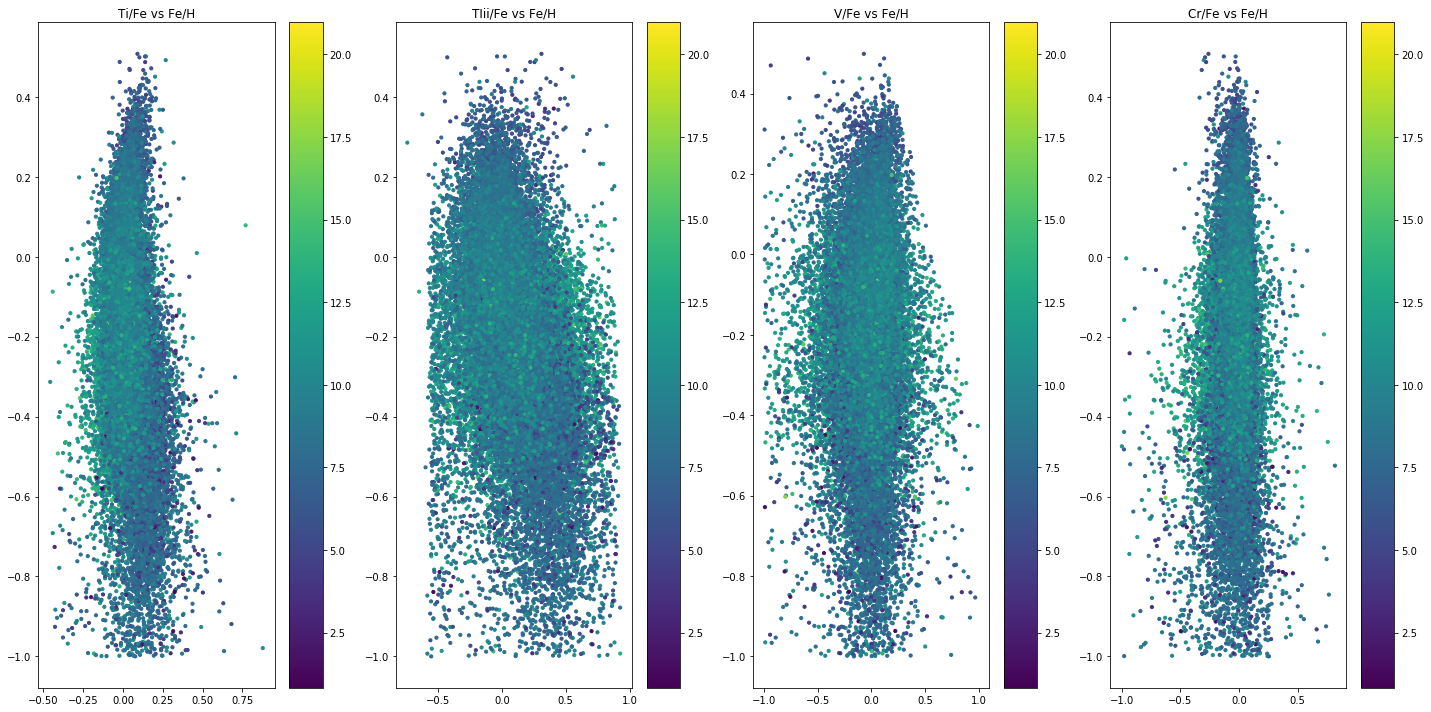

In [76]:
plt.figure(figsize=(20, 10))
ax13 = plt.subplot(1,4,1)
P13 = ax13.scatter(GSTI_FE[ticut], GSFE_H[ticut], s=10, c=GSRAD[ticut])
plt.title('Ti/Fe vs Fe/H')
plt.colorbar(P13)
ax14 = plt.subplot(1,4,2)
P14 = ax14.scatter(GSTIII_FE[tiiicut], GSFE_H[tiiicut], s=10, c=GSRAD[tiiicut])
plt.title('TIii/Fe vs Fe/H')
plt.colorbar(P14)
ax15 = plt.subplot(1,4,3)
P15 = ax15.scatter(GSV_FE[vcut], GSFE_H[vcut], s=10, c=GSRAD[vcut])
plt.title('V/Fe vs Fe/H')
plt.colorbar(P15)
ax16 = plt.subplot(1,4,4)
P16 = ax16.scatter(GSCR_FE[crcut], GSFE_H[crcut], s=10, c=GSRAD[crcut])
plt.title('Cr/Fe vs Fe/H')
plt.colorbar(P16)
plt.tight_layout()

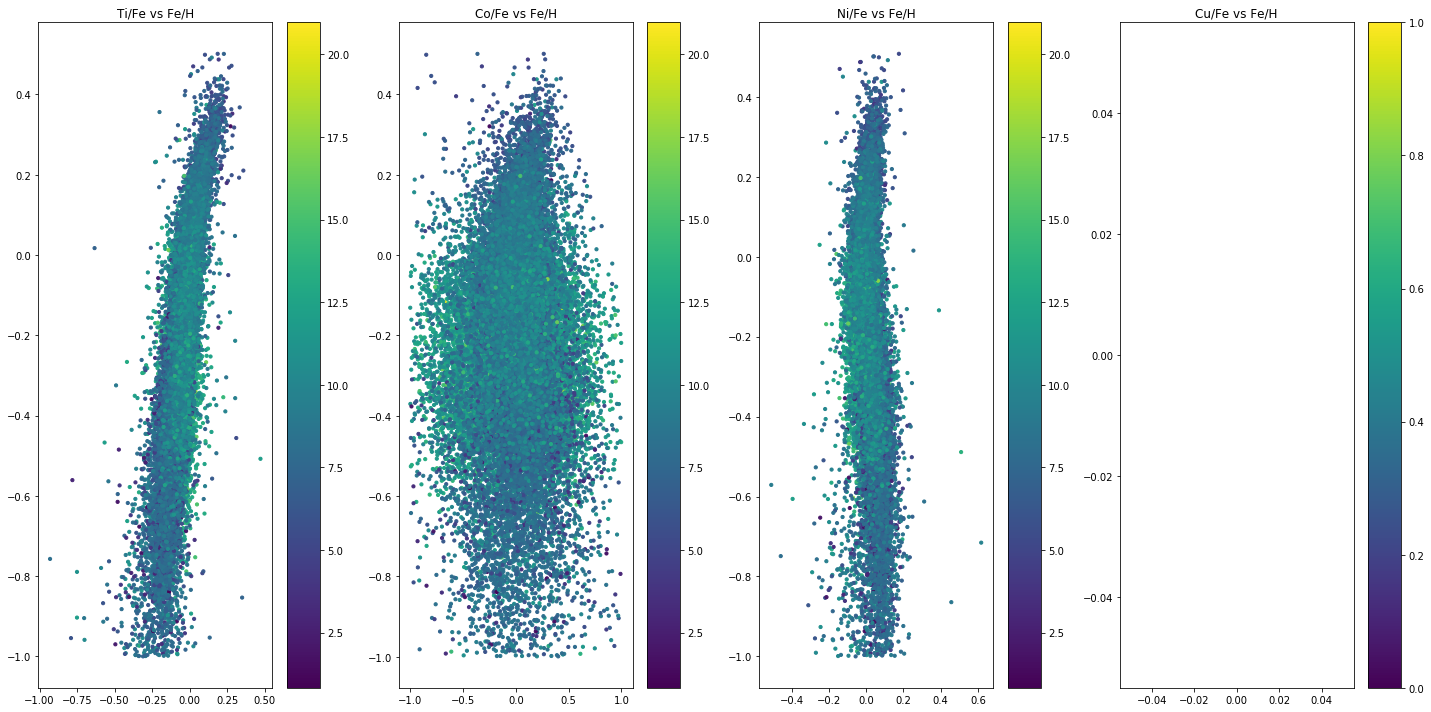

In [77]:
plt.figure(figsize=(20, 10))
ax17 = plt.subplot(1,4,1)
P17 = ax17.scatter(GSMN_FE[mncut], GSFE_H[mncut], s=10, c=GSRAD[mncut])
plt.title('Ti/Fe vs Fe/H')
plt.colorbar(P17)
ax18 = plt.subplot(1,4,2)
P18 = ax18.scatter(GSCO_FE[cocut], GSFE_H[cocut], s=10, c=GSRAD[cocut])
plt.title('Co/Fe vs Fe/H')
plt.colorbar(P18)
ax19 = plt.subplot(1,4,3)
P19 = ax19.scatter(GSNI_FE[nicut], GSFE_H[nicut], s=10, c=GSRAD[nicut])
plt.title('Ni/Fe vs Fe/H')
plt.colorbar(P19)
ax20 = plt.subplot(1,4,4)
P20 = ax20.scatter(GSCU_FE[cucut], GSFE_H[cucut], s=10, c=GSRAD[cucut])
plt.title('Cu/Fe vs Fe/H')
plt.colorbar(P20)
plt.tight_layout()

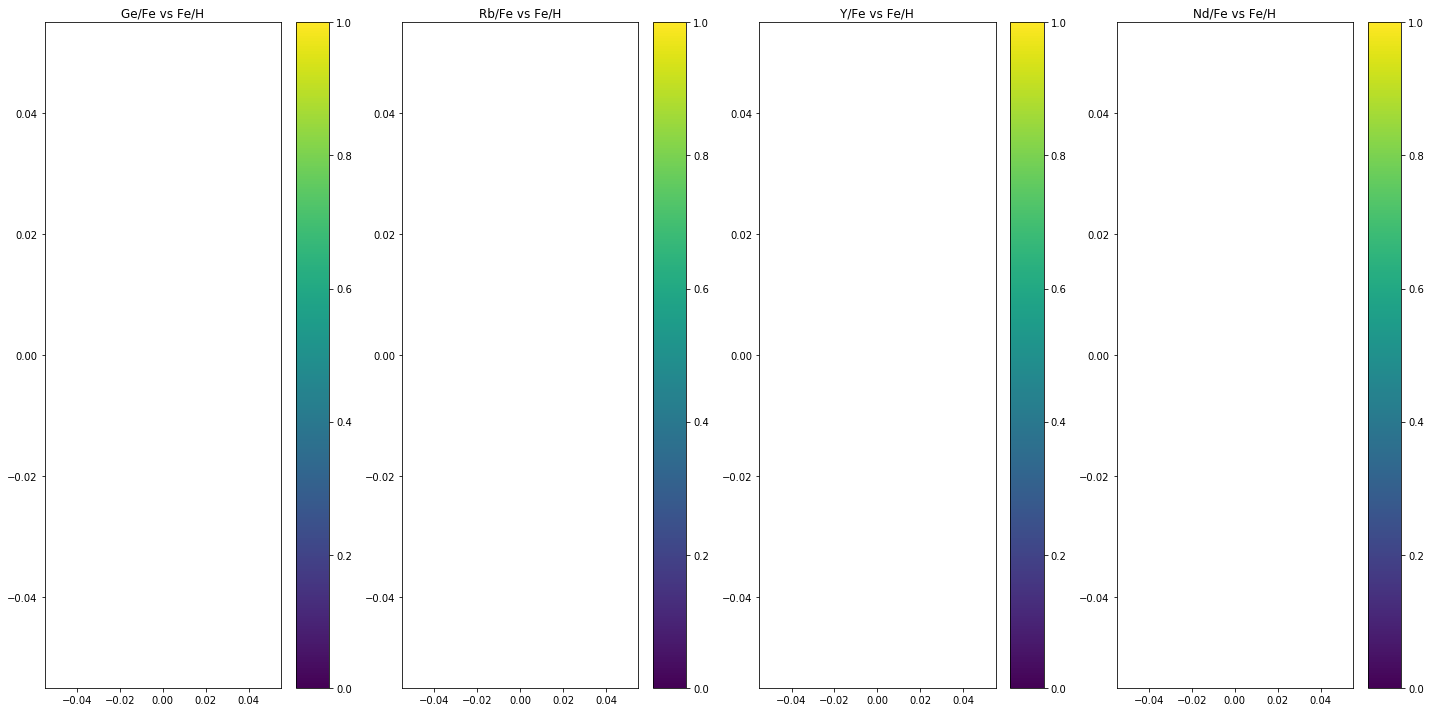

In [78]:
plt.figure(figsize=(20, 10))
ax21 = plt.subplot(1,4,1)
P21 = ax21.scatter(GSGE_FE[gecut], GSFE_H[gecut], s=10, c=GSRAD[gecut])
plt.title('Ge/Fe vs Fe/H')
plt.colorbar(P21)
ax22 = plt.subplot(1,4,2)
P22 = ax22.scatter(GSRB_FE[rbcut], GSFE_H[rbcut], s=10, c=GSRAD[rbcut])
plt.title('Rb/Fe vs Fe/H')
plt.colorbar(P22)
ax23 = plt.subplot(1,4,3)
P23 = ax23.scatter(GSY_FE[ycut], GSFE_H[ycut], s=10, c=GSRAD[ycut])
plt.title('Y/Fe vs Fe/H')
plt.colorbar(P23)
ax24 = plt.subplot(1,4,4)
P24 = ax24.scatter(GSND_FE[ndcut], GSFE_H[ndcut], s=10, c=GSRAD[ndcut])
plt.title('Nd/Fe vs Fe/H')
plt.colorbar(P24)
plt.tight_layout()

In [ ]:
##import the csv file of the MC distance values for actual errorbar info

The mean and std is:  14.666666666666666 0.0
The mean and std is:  6.416666666666667 0.0
The mean and std is:  1.6113861386138615 0.0
The mean and std is:  0.8908610271903323 0.0
The mean and std is:  0.26888080072793447 0.0
The mean and std is:  0.14954884268340526 0.0
The mean and std is:  0.15791520809023726 0.0
The mean and std is:  0.13095238095238096 0.0


Text(0.5,1,'Cylindrical Coordinates')

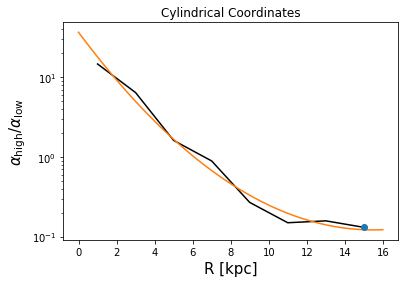

In [104]:
xval = np.arange(-1, 1, 0.05)
m = -0.05
c = 0.08
yval = m*xval + c
avg = np.mean(yval)
minZheights = [0.0, 0.5, 1.0]
maxZheights = [0.5, 1.0, 2.0]
mean_ratio_alpha = []
std_ratio_alpha = []
ratio_alpha = []
for i, (minr, maxr) in enumerate(zip(minRadius, maxRadius)):
    index_cr = np.logical_and( GSCYLRAD > minr, GSCYLRAD <= maxr)
    index_radius = np.logical_and(radius > minr, radius <= maxr)
    high_alpha_index = (GSAM > avg) & index_cr
    low_alpha_index = (GSAM <= avg) & index_cr

    nlow_alpha = np.sum(low_alpha_index)
    nhigh_alpha = np.sum(high_alpha_index)
    ratio_alpha = float(nhigh_alpha)/nlow_alpha

    print('The mean and std is: ',np.mean(ratio_alpha), np.std(ratio_alpha))
    mean_ratio_alpha.append(np.mean(ratio_alpha))
    std_ratio_alpha.append(np.std(ratio_alpha))
plt.errorbar(0.5*(minr + maxr), np.mean(ratio_alpha), yerr=np.std(ratio_alpha), fmt='o')
plt.plot(0.5*(minRadius + maxRadius), mean_ratio_alpha, c='k')
p = np.poly1d(np.polyfit(0.5*(minRadius + maxRadius), np.log10(mean_ratio_alpha), 2))
x = np.linspace(0, 16, 100)
plt.plot(x, 10**p(x))
plt.yscale('log')
plt.xlabel('R [kpc]', fontsize=15)
plt.ylabel(r'$\alpha_{\mathrm{high}}/\alpha_{\mathrm{low}}$', fontsize=15)
plt.title('Cylindrical Coordinates')

In [ ]:
##Plans for data - crossmatch with the ages of the stars - create graphs comparing ages to high/low alpha and other
##elements: average age and age distribution

##pull the coefficients out of the poly1d function that you used for the line of best fit - there is apparently a way
##to do this

In [82]:
import h5py
filename = 'gaia_spectro.hdf5'
f = h5py.File(filename, 'r')
data = f['data']

In [91]:
data.dtype

dtype([('obsid', '<f8'), ('dm', '<f8'), ('dm_err', '<f8'), ('dist', '<f8'), ('dist_err', '<f8'), ('par', '<f8'), ('par_err', '<f8'), ('log10_age', '<f8'), ('log10_age_err', '<f8'), ('mass', '<f8'), ('mass_err', '<f8'), ('Z', '<f8'), ('Z_err', '<f8'), ('log10_av', '<f8'), ('log10_av_err', '<f8'), ('log10_teff', '<f8'), ('log10_teff_err', '<f8'), ('logg', '<f8'), ('logg_err', '<f8'), ('dm_log10age_corr', '<f8'), ('log10age_Z_corr', '<f8'), ('dm_Z_corr', '<f8'), ('l', '<f8'), ('b', '<f8'), ('s', '<f8'), ('vlos', '<f8'), ('mu_l', '<f8'), ('mu_b', '<f8'), ('R', '<f8'), ('phi', '<f8'), ('z', '<f8'), ('vR', '<f8'), ('vphi', '<f8'), ('vz', '<f8'), ('JR', '<f8'), ('Lz', '<f8'), ('Jz', '<f8'), ('Rc', '<f8'), ('s_err', '<f8'), ('vlos_err', '<f8'), ('mu_l_err', '<f8'), ('mu_b_err', '<f8'), ('R_err', '<f8'), ('phi_err', '<f8'), ('z_err', '<f8'), ('vR_err', '<f8'), ('vphi_err', '<f8'), ('vz_err', '<f8'), ('JR_err', '<f8'), ('Lz_err', '<f8'), ('Jz_err', '<f8'), ('Rc_err', '<f8'), ('flag', '<i8'), ('s

In [98]:
data['APOGEE_ID']

array([b'2M13120985+1823115', b'2M00000211+6327470',
       b'2M00000222+5625359', ..., b'', b'', b''], dtype='|S18')

In [27]:
take1 = np.logical_and(radius > 0., radius <=2.)
ID1 = ID[take1]
DIST1 = DIST[take1]
DLO1 = DLO[take1]
DHI1 = DHI[take1]
TEMP1 = TEMP[take1]
TEMPERR1 = TEMPERR[take1]
LOGG1 = LOGG[take1]
LOGGERR1 = LOGG[take1]
MH1 = MH[take1]
MHERR1 = MHERR[take1]
AM1 = AM[take1]
AMERR1 = AMERR[take1]
X_H1 = X_H[take1]
X_H_ERR1 = X_H_ERR[take1]
X_M1 = X_M[take1]
X_M_ERR1 = X_M_ERR[take1]
C_FE1 = C_FE[take1]
CI_FE1 = CI_FE[take1]
N_FE1 = N_FE[take1]
O_FE1 = O_FE[take1]
NA_FE1 = NA_FE[take1]
MG_FE1 = MG_FE[take1]
AL_FE1 = AL_FE[take1]
SI_FE1 = SI_FE[take1]
P_FE1 = P_FE[take1]
S_FE1 = S_FE[take1]
K_FE1 = K_FE[take1]
CA_FE1 = CA_FE[take1]
TI_FE1 = TI_FE[take1]
TIII_FE1 = TIII_FE[take1]
V_FE1 = V_FE[take1]
CR_FE1 = CR_FE[take1]
MN_FE1 = MN_FE[take1]
FE_H1 = FE_H[take1]
CO_FE1 = CO_FE[take1]
NI_FE1 = NI_FE[take1]
CU_FE1 = CU_FE[take1]
GE_FE1 = GE_FE[take1]
RB_FE1 = RB_FE[take1]
Y_FE1 = Y_FE[take1]
ND_FE1 = ND_FE[take1]
RAD1 = radius[take1]

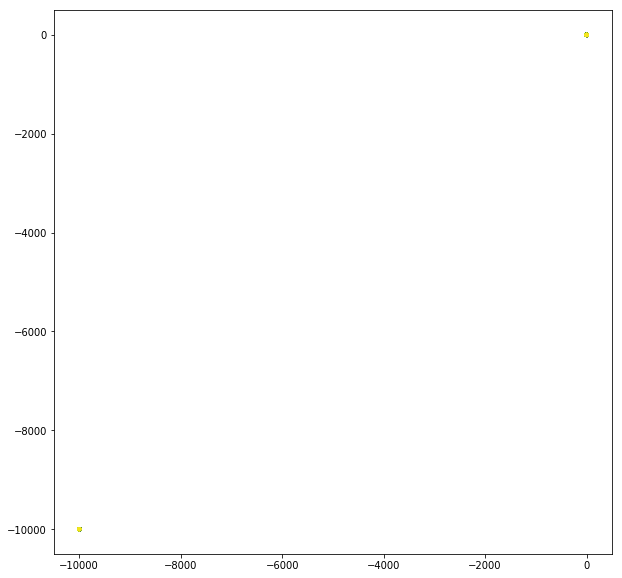

In [29]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(111)
P1 = ax1.scatter(AM1, FE_H1, s=10, c=RAD1)

In [25]:
minRadius = np.arange(0, 15, 2)
maxRadius = np.arange(2, 17, 2)
minZheights = [0.0, 0.5, 1.0]
maxZheights = [0.5, 1.0, 2.0]
for i, (minr, maxr) in enumerate(zip(minRadius, maxRadius)):
    index_cr = np.logical_and( cr > minr, cr <= maxr)
    index_radius = np.logical_and(radius > minr, radius <= maxr)

<Quantity [10.29042647,  8.28131729,  8.68104663, ...,  8.24695436,
            9.60949248,  8.40122624]>

0 2


198666